<a href="https://colab.research.google.com/github/eblio/dlolc/blob/main/Compte_rendu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compte-rendu du projet d'apprentissage profond 
## Reconnaissance de champions de *League of Legends* 


*   Younes Abounaceur
*   Alexandre Dang
*   Elio Saboureau
*   Alexndre Riviere



Le but de ce projet et de créer un réseau de neurones permettant la reconnaissance de champions sur le jeu *League of Legends*.\
Ce sujet est assez large pour être traité avec différents niveaux de précisions, tout d'abords nous nous limitons à 10 champions avec un seul champions par image, centré sur l'image. \

Nous avons donc commencé par créé un réseau de neurones convolutifs adapté à notre sujet puis l'avons entrainé sur les images obtenues qui ont également servient en partie d'ensemble de validation et de testes.

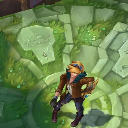
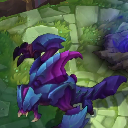

In [8]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

!git clone https://github.com/eblio/dlolc.git
train_it = datagen.flow_from_directory('./dlolc/data/train/', class_mode='categorical', batch_size=64, target_size= (128,128))
val_it = datagen.flow_from_directory('./dlolc/data/validation/', class_mode='categorical', batch_size=64, target_size= (128,128))
test_it = datagen.flow_from_directory('./dlolc/data/test/', class_mode='categorical', batch_size=64, target_size= (128,128))

fatal: destination path 'dlolc' already exists and is not an empty directory.
Found 6408 images belonging to 10 classes.
Found 2140 images belonging to 10 classes.
Found 2142 images belonging to 10 classes.


On a commencé par un réseau de neurones convolutifs avec des paramètres arbitraires 
L'architecture est la suivante : 

In [2]:
from tensorflow import keras
model = keras.models.load_model('./dlolc/keras models/premier_model')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0

Pour le plaisir, on peut vérifier que le modèle non entrainé à bien environ 10% de succès.

In [9]:
loss,acc = model.evaluate(test_it)
print("Accuracy du modele non entrainé : "+ str(acc*100) +"%")

34/34 [==============================] - 44s 1s/step - loss: 8.5524 - accuracy: 0.0994
Accuracy du modele non entrainé : 9.943977743387222%


Une fois entrainé sur notre base de données (environ 10 000 images) on obtien un réseau de neurones efficace à environ 95%

In [12]:
model = keras.models.load_model('./dlolc/keras models/premier_model_entrainé')
loss,acc = model.evaluate(test_it)
print("Accuracy du modele entrainé : "+ str(acc*100) +"%")

34/34 [==============================] - 44s 1s/step - loss: 0.4063 - accuracy: 0.8950
Accuracy du modele entrainé : 89.4957959651947%


# 95% de précision, est-ce assez ?

A première vue on pourrait être satisfait d'un taux de précision de 95% et on pourrait se dire que l'on peut passer à l'étape suivante.\
Malheureusement avant de complexifier le problème il faut se rendre compte d'une chose, les images de testes sont tirées des mêmes vidéos que les images de l'ensemble d'entrainement et de validation, il y a une continuité entre ces images. Pour chaque image de l'ensemble de teste, le réseau de neurones s'est entrainé sur la frame d'avant et d'après. Pour vraiment tester l'efficacité de notre réseau de neurones, il faudrait donc se filmer de nouveau, dans des conditions similaires, de sorte à créer des images similaires à celle que l'ont a déjà mais pas dans leur continuité. 